In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X, y = train.drop('label', axis=1), train['label']

In [6]:
type(X)

pandas.core.frame.DataFrame

In [10]:
X.shape

(42000, 784)

In [7]:
X = X.to_numpy()

1


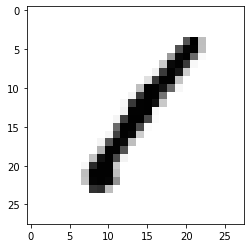

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
print(y[0])
plt.imshow(X[0].reshape(28, 28), cmap='Greys')

In [13]:
X = X.reshape(X.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
X = X.astype('float32')
X /= 255
print('x_shape', X.shape)
print('number of images', X.shape[0])

x_shape (42000, 28, 28, 1)
number of images 42000


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [66]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x=X, y=y, epochs=100)

Epoch 1/100
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0769 - accuracy: 0.9761
Epoch 2/100
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0698 - accuracy: 0.9776
Epoch 3/100
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0650 - accuracy: 0.9782
Epoch 4/100
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0646 - accuracy: 0.9793
Epoch 5/100
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0595 - accuracy: 0.9809
Epoch 6/100
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0566 - accuracy: 0.9813
Epoch 7/100
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0530 - accuracy: 0.9834
Epoch 8/100
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0508 - accuracy: 0.9835
Epoch 9/100
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0466 - accuracy: 0.9842
Epoch 10/100
1313/1313 [==============================] - 11s 9m

1313/1313 [==============================] - 11s 8ms/step - loss: 0.0118 - accuracy: 0.9961
Epoch 80/100
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0110 - accuracy: 0.9964
Epoch 81/100
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0106 - accuracy: 0.9962
Epoch 82/100
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0119 - accuracy: 0.9959
Epoch 83/100
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0119 - accuracy: 0.9960
Epoch 84/100
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0104 - accuracy: 0.9964
Epoch 85/100
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0113 - accuracy: 0.9960
Epoch 86/100
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0111 - accuracy: 0.9960
Epoch 87/100
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0116 - accuracy: 0.9960
Epoch 88/100
1313/1313 [==============================] - 11s 8ms/st

In [67]:
test.shape

(28000, 28, 28, 1)

In [68]:
test = test.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [70]:
test = test.reshape(28000, 28, 28, 1)

7


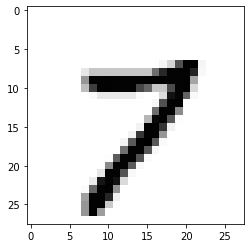

In [71]:
plt.imshow(test[4577].reshape(28, 28), cmap='Greys')
pred = model.predict(test[4577].reshape(1, 28, 28, 1))
print(pred.argmax())

In [72]:
pred = model.predict(test)

In [73]:
type(pred)

numpy.ndarray

In [74]:
sub = np.ndarray(28000)
for i in range(len(pred)):
    sub[i] = int(pred[i].argmax())
    

In [75]:
sub

array([2., 0., 9., ..., 3., 9., 2.])

In [76]:
sub = sub.astype(int)

In [77]:
sam_submission = pd.read_csv('sample_submission.csv')

In [78]:
sam_submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [79]:
sam_submission['Label'] = sub

In [80]:
sam_submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [81]:
sam_submission.reset_index(drop=True, inplace=True)

In [82]:
sam_submission.to_csv('submission.csv', index=False)